In [1]:
import torch
import torch.nn as nn
from encoder import EncoderTransformer
import matplotlib.pyplot as plt

In [2]:
# generate artifical token IDs sequences
batch_size = 16
vocabulary_size = 50
max_sequence_length = 30

source = torch.randint(0, vocabulary_size, (batch_size, max_sequence_length))
target = torch.randint(0, vocabulary_size, (batch_size, max_sequence_length))

In [3]:
# define a tiny transformer encoder model
num_heads = 2
layer_encoder = 2
embedding_dim = 128
mlp_dim = 128
output_dim = 128

transformer = EncoderTransformer(max_sequence_length, layer_encoder, num_heads, 
                                 embedding_dim, mlp_dim, output_dim, vocabulary_size)

In [4]:
# example of model output before training
input_sequence = source[0, None]
output_probs = transformer(input_sequence)
output_sequence = torch.argmax(output_probs, dim=-1)
print("Predicted output sequence: \n", output_sequence)
print("Target sequence: \n", target[0, None])

Predicted output sequence: 
 tensor([[16, 48, 40, 38, 23, 16, 11,  1, 27, 47, 29, 43,  3, 28, 25, 42,  5, 16,
          9, 11, 44, 25, 37, 19, 42, 45, 34, 27, 15, 14]])
Target sequence: 
 tensor([[43, 13,  0, 14, 10, 38, 49, 20, 24, 14, 23, 15,  6, 38, 48,  6,  3, 33,
         17, 48, 46, 31, 38,  0,  0, 33, 30, 26,  5, 15]])


In [5]:
# define cross-entropy loss and Adam optimiser
criterion = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(transformer.parameters(), lr=3e-4)

In [6]:
# training loop
num_epochs = 500
history = {"epoch": [], "loss": [], "accuracy": []}
for epoch in range(num_epochs):
    optimiser.zero_grad()
    output = transformer(source)
    output = output.view(-1, vocabulary_size)
    loss = criterion(output, target.view(-1))
    loss.backward()
    optimiser.step()
    # evaluate performance on the batch
    with torch.no_grad():
        history["epoch"].append(epoch)
        history["loss"].append(loss.item())
        history["accuracy"].append((torch.argmax(output, dim=-1) == target.view(-1)).float().mean())

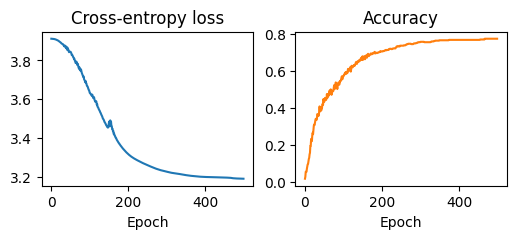

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
ax1.plot(history["epoch"], history["loss"], c="C0")
ax2.plot(history["epoch"], history["accuracy"], c="C1")
ax1.set_xlabel("Epoch")
ax1.set_title("Cross-entropy loss")
ax2.set_xlabel("Epoch")
ax2.set_title("Accuracy")
plt.show()

In [8]:
# example of model output after training
input_sequence = source[0, None]
output_probs = transformer(input_sequence)
output_sequence = torch.argmax(output_probs, dim=-1)
print("Predicted output sequence: \n", output_sequence)
print("Target sequence: \n", target[0, None])

Predicted output sequence: 
 tensor([[43, 13,  1, 14, 10, 38, 49, 20, 24, 16, 23, 15,  6, 28, 39,  1,  3, 12,
         17, 48, 46, 31, 47,  0,  9, 33, 30, 26,  5, 29]])
Target sequence: 
 tensor([[43, 13,  0, 14, 10, 38, 49, 20, 24, 14, 23, 15,  6, 38, 48,  6,  3, 33,
         17, 48, 46, 31, 38,  0,  0, 33, 30, 26,  5, 15]])
